# Importing the required libraries

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from platform import python_version
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(python_version())

%matplotlib inline

3.6.9


# Constants

In [2]:
alfa = 0.05

# Importing the data

In [3]:
iris = sns.load_dataset('iris')

# Checking the data

In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# Splitting the data

In [8]:
setosa = iris.loc[iris['species'] == 'setosa']

versicolor = iris.loc[iris['species'] == 'versicolor']

virginica = iris.loc[iris['species'] == 'virginica']

In [9]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [11]:
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


# Splitting the data for validation (latter)

In [12]:
from sklearn.model_selection import train_test_split

train_setosa, test_setosa = train_test_split(setosa, test_size=10, random_state=42)

train_versicolor, test_versicolor = train_test_split(versicolor, test_size=10, random_state=42)

train_virginica, test_virginica = train_test_split(virginica, test_size=10, random_state=42)


In [13]:
data = pd.concat([train_setosa, train_versicolor, train_virginica])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 12 to 138
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
4,5.0,3.6,1.4,0.2,setosa
37,4.9,3.6,1.4,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


# Analyzing the data

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,5.849167,0.826148,4.4,5.100,5.8,6.4,7.9
sepal_width,120.0,3.066667,0.431401,2.0,2.800,3.0,3.3,4.4
petal_length,120.0,3.775000,1.773202,1.0,1.575,4.4,5.1,6.9
petal_width,120.0,1.210833,0.765297,0.1,0.300,1.3,1.8,2.5


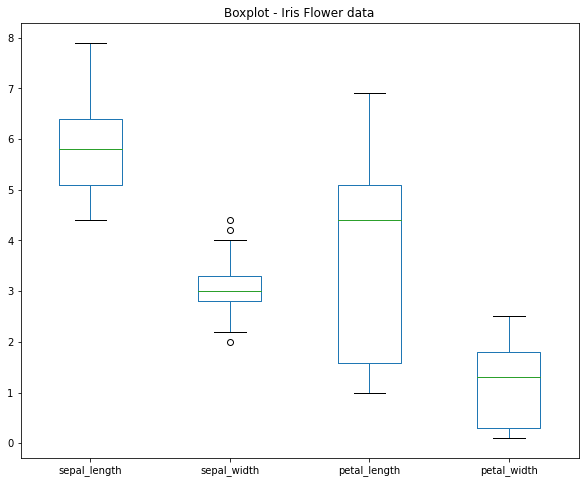

In [16]:
data.boxplot(grid=False, figsize=(10,8))
plt.title("Boxplot - Iris Flower data")
plt.savefig("boxplot_data_iris_flower.png", dpi=100)
plt.show()

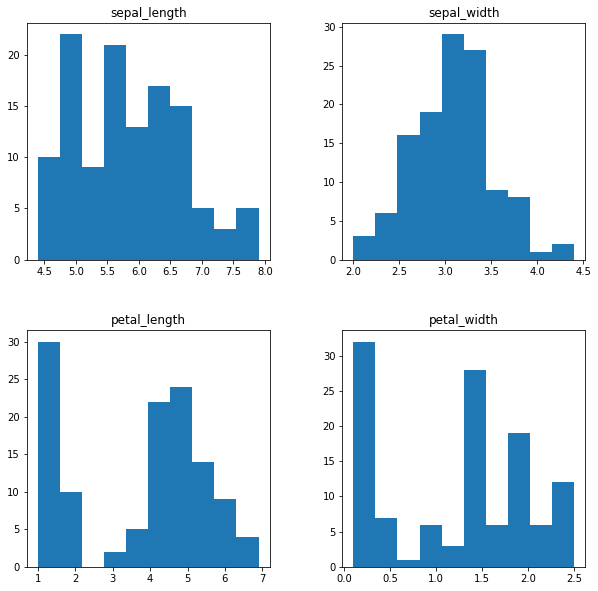

In [17]:
data.hist(grid=False, figsize=(10,10))
plt.savefig("histogram_iris_flower_data.png", dpi=100)
plt.show()

# Checking the data distribution

With 95.0% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.0278)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


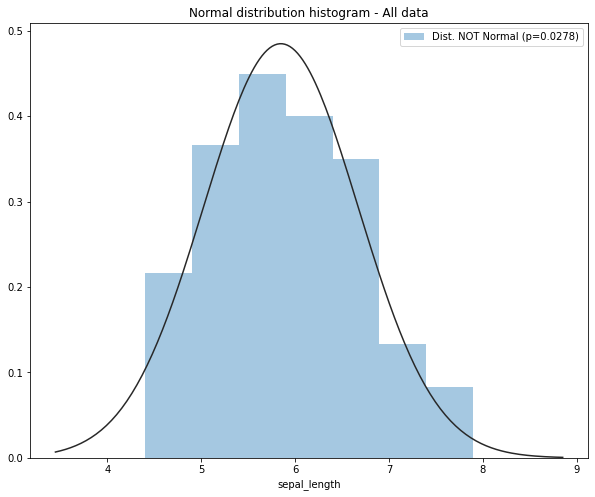

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.261)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


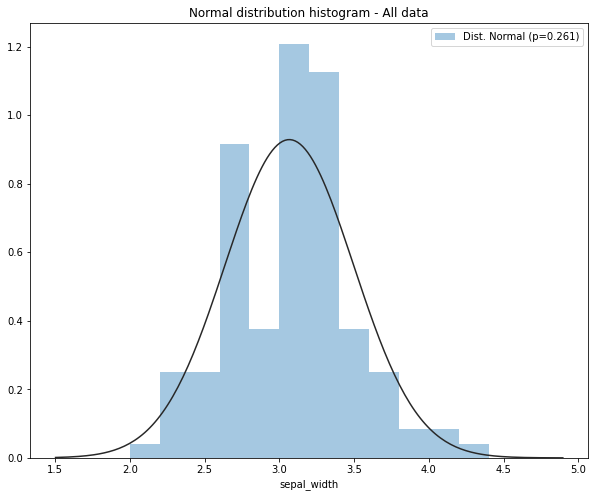

With 95.0% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 9.23e-09)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


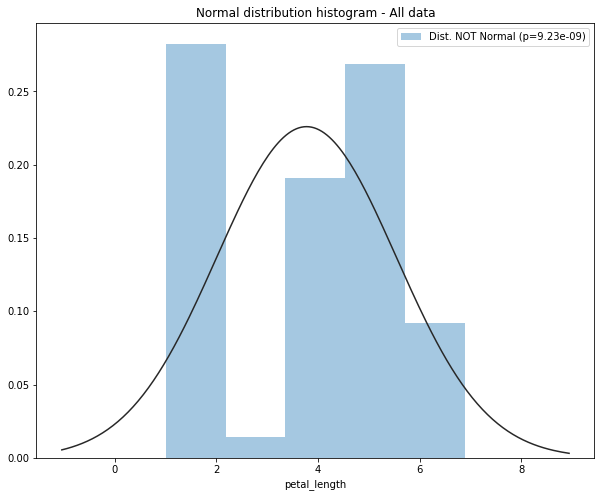

With 95.0% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 1.65e-07)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


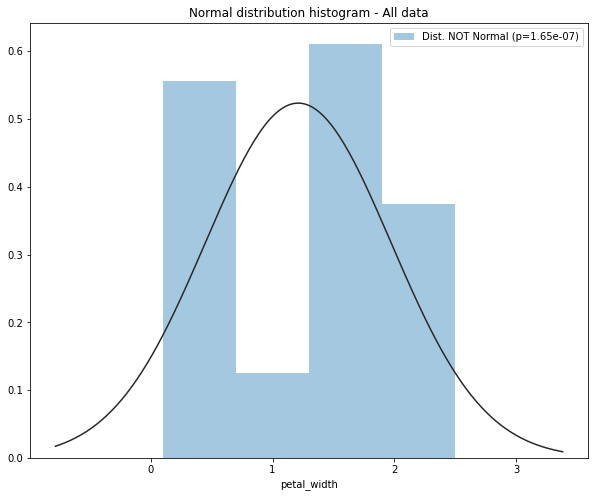

In [18]:
# Loop to iterate over all the characteristics of the Iris flower

column_names = data.columns
for i in range(len(column_names) - 1):

  # Applying the Shapiro-Wilk test (at alfa level)
  shapiro_stat, shapiro_p = stats.shapiro(data[column_names[i]])

  if shapiro_p > alfa:
    auxiliar = "Dist. Normal (p=" + "{:.3}".format(shapiro_p) + ")"
    print("With " + str(100 - 100*alfa) + "% of confidence, we have NO evidence to reject the Normality hypotheses of the data, " + 
          "according to the Shapiro-Wilk test (p - value = " + "{:.3}".format(shapiro_p) + ")")
  else:
    auxiliar = "Dist. NOT Normal (p=" + "{:.3}".format(shapiro_p) + ")"
    print("With " + str(100 - 100*alfa) + "% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, " + 
          "according to the Shapiro-Wilk test (p - value = " + "{:.3}".format(shapiro_p) + ")")

  plt.figure(figsize=(10,8))
  sns.distplot(data[column_names[i]], fit=stats.norm, kde=False, label=auxiliar)
  plt.legend()
  plt.title("Normal distribution histogram - All data")

  plt.savefig("hist_normal_data_" + column_names[i] + ".png", dpi=100)

  plt.show()

# Checking the data distribution for each variety of the Iris flower

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.283)


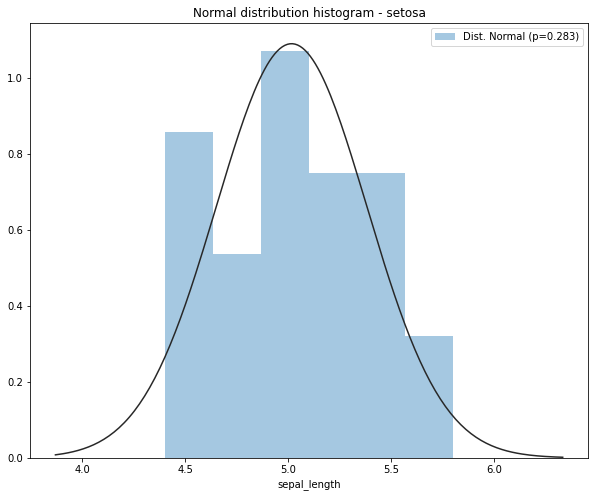

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.361)


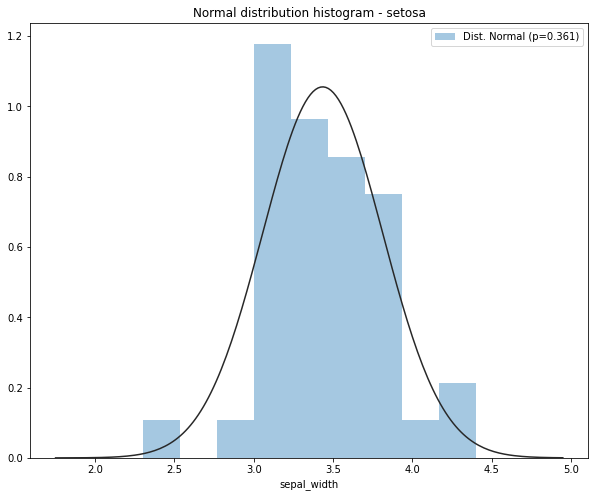

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.0645)


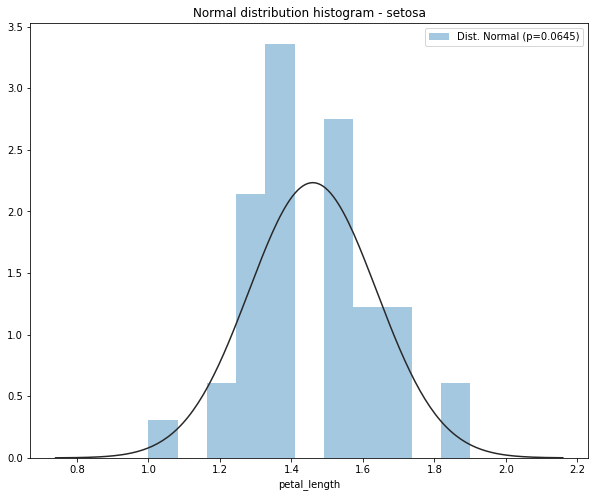

With 95.0% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 1.1e-06)


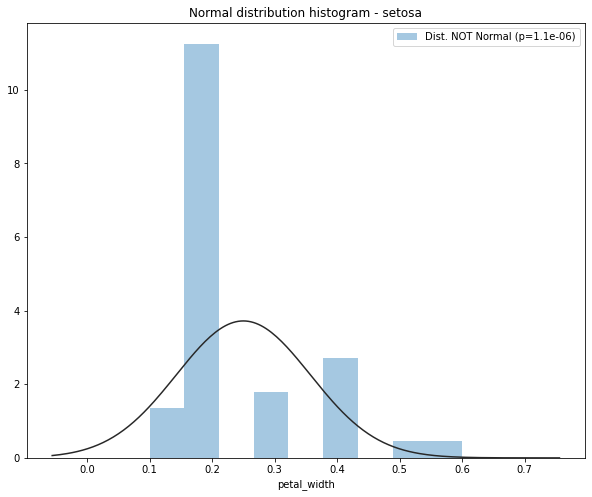

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.761)


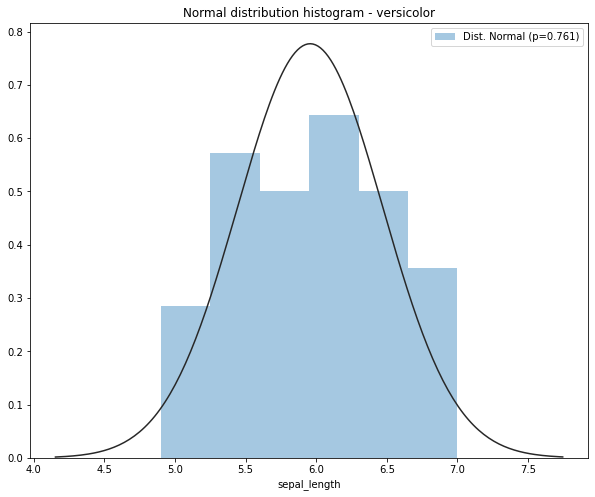

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.191)


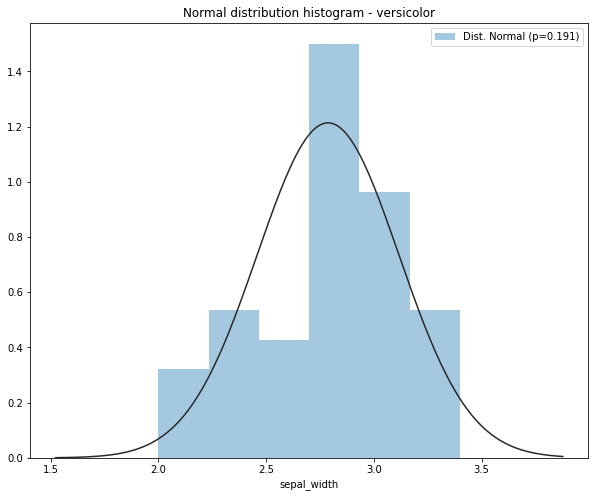

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.0935)


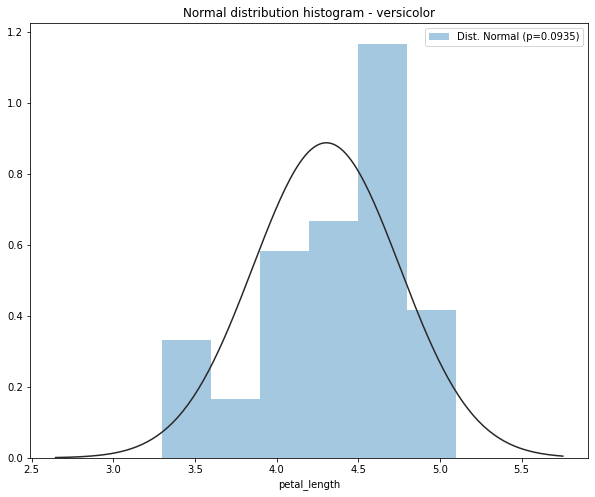

With 95.0% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.0153)


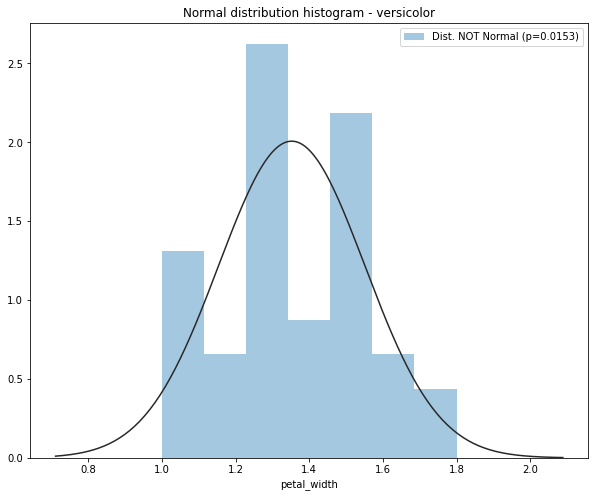

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.294)


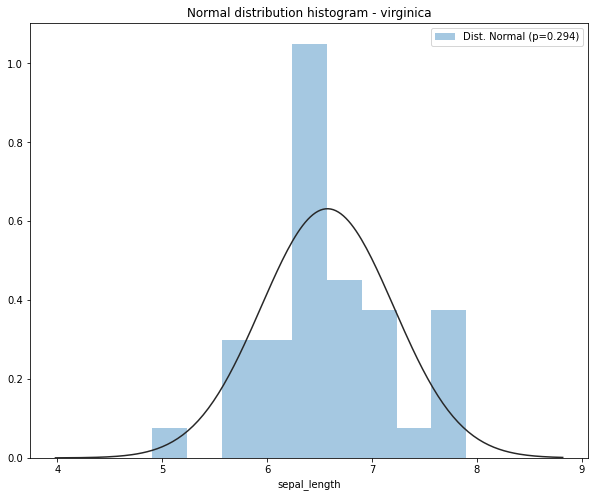

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.136)


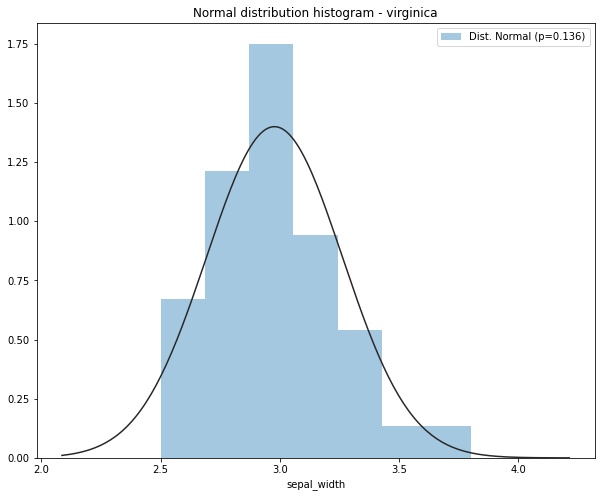

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.259)


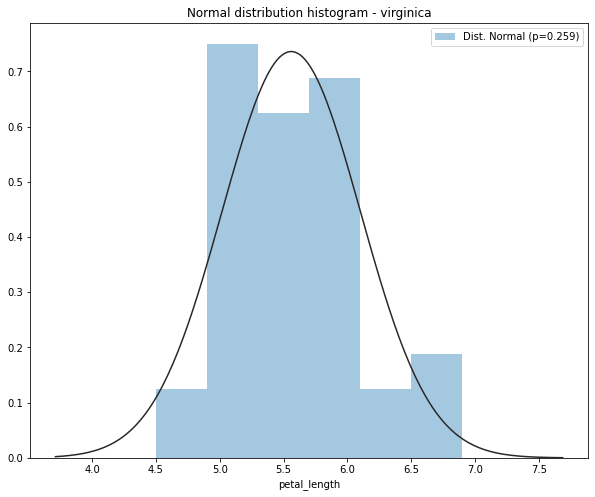

With 95.0% of confidence, we have NO evidence to reject the Normality hypotheses of the data, according to the Shapiro-Wilk test (p - value = 0.124)


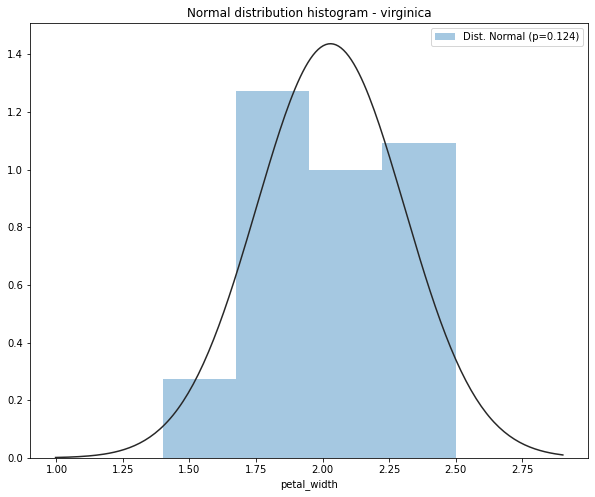

In [25]:

column_names = data.columns
iris_variety = data.species.unique()

# Loop to iterate over all the iris species
for j in range(len(iris_variety)):
  title = iris_variety[j]
  data_auxiliar = data.loc[data['species'] == title]

  # Loop to iterate over all the characteristics of the Iris flower
  for i in range(len(column_names) - 1):

    # Applying the Shapiro-Wilk test (at alfa level)
    shapiro_stat, shapiro_p = stats.shapiro(data_auxiliar[column_names[i]])

    if shapiro_p > alfa:
      auxiliar = "Dist. Normal (p=" + "{:.3}".format(shapiro_p) + ")"
      print("With " + str(100 - 100*alfa) + "% of confidence, we have NO evidence to reject the Normality hypotheses of the data, " + 
            "according to the Shapiro-Wilk test (p - value = " + "{:.3}".format(shapiro_p) + ")")
    else:
      auxiliar = "Dist. NOT Normal (p=" + "{:.3}".format(shapiro_p) + ")"
      print("With " + str(100 - 100*alfa) + "% of confidence, we HAVE evidence to reject the Normality hypotheses of the data, " + 
            "according to the Shapiro-Wilk test (p - value = " + "{:.3}".format(shapiro_p) + ")")

    plt.figure(figsize=(10,8))
    sns.distplot(data_auxiliar[column_names[i]], fit=stats.norm, kde=False, label=auxiliar)
    plt.legend()
    plt.title("Normal distribution histogram - " + title)

    plt.savefig("hist_normal_data_" + title + "_" + column_names[i] + ".png", dpi=100)

    plt.show()


# Basic stats for each variety

In [28]:
for j in range(len(iris_variety)):
  print(iris_variety[j])
  print(data.loc[data['species'] == iris_variety[j]].describe().transpose())
  print(" ")

setosa
              count   mean       std  min    25%  50%    75%  max
sepal_length   40.0  5.015  0.370412  4.4  4.775  5.0  5.250  5.8
sepal_width    40.0  3.435  0.382669  2.3  3.200  3.4  3.625  4.4
petal_length   40.0  1.460  0.180881  1.0  1.375  1.4  1.525  1.9
petal_width    40.0  0.250  0.108604  0.1  0.200  0.2  0.300  0.6
 
versicolor
              count    mean       std  min  25%   50%  75%  max
sepal_length   40.0  5.9575  0.519806  4.9  5.6  6.00  6.3  7.0
sepal_width    40.0  2.7875  0.332965  2.0  2.6  2.85  3.0  3.4
petal_length   40.0  4.3050  0.455142  3.3  4.0  4.40  4.6  5.1
petal_width    40.0  1.3525  0.201262  1.0  1.3  1.30  1.5  1.8
 
virginica
              count    mean       std  min  25%  50%    75%  max
sepal_length   40.0  6.5750  0.639611  4.9  6.3  6.5  6.900  7.9
sepal_width    40.0  2.9775  0.288664  2.5  2.8  3.0  3.125  3.8
petal_length   40.0  5.5600  0.549032  4.5  5.1  5.6  5.825  6.9
petal_width    40.0  2.0300  0.281206  1.4  1.8  2.0  2.30

# Individuals boxplots for the iris flower varieties

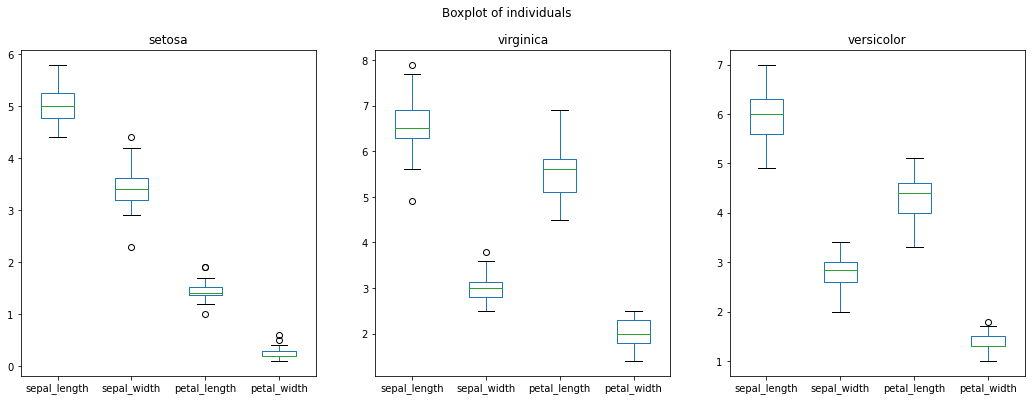

In [34]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
data.loc[data['species'] == 'setosa'].boxplot(ax=ax[0], grid=False)
ax[0].set_title('setosa')
data.loc[data['species'] == 'virginica'].boxplot(ax=ax[1], grid=False)
ax[1].set_title('virginica')
data.loc[data['species'] == 'versicolor'].boxplot(ax=ax[2], grid=False)
ax[2].set_title('versicolor')
plt.suptitle("Boxplot of individuals")
plt.savefig("boxplot_individuals_iris_flower.png", dpi=100)
plt.show()

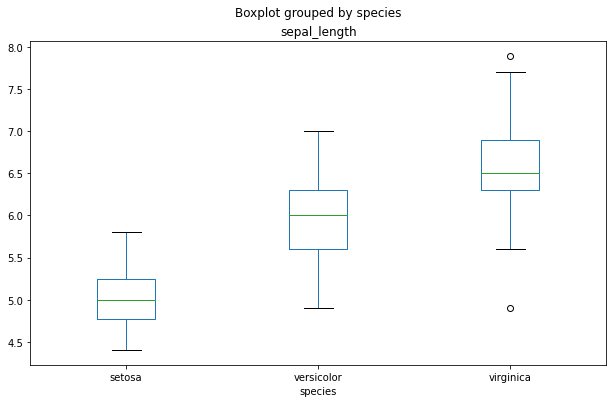

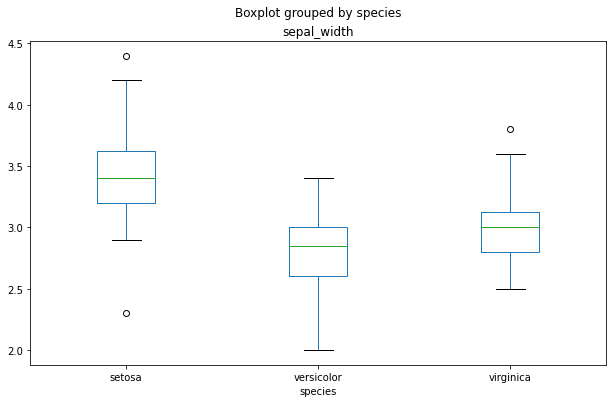

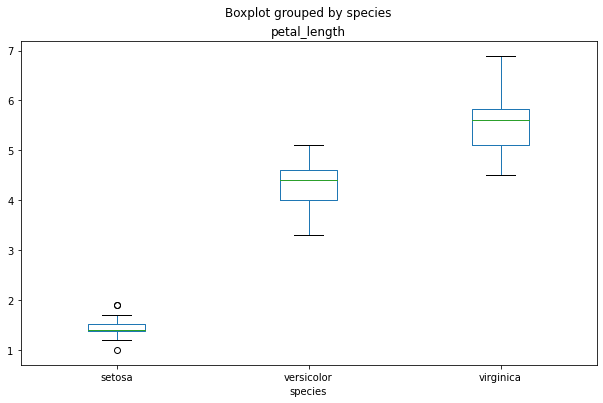

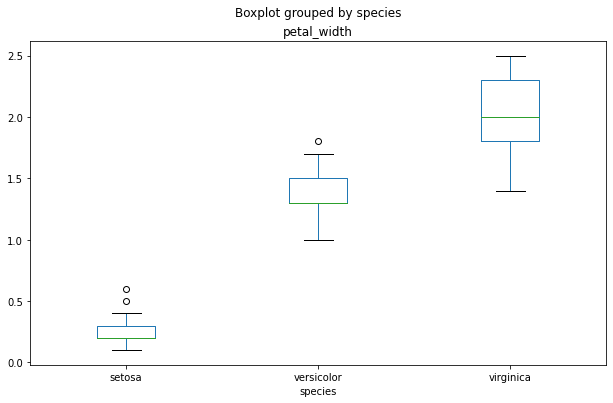

In [36]:
for i in range(len(column_names) - 1 ):
  data.boxplot(column=[column_names[i]], by='species', grid=False, figsize=(10,6))
  plt.savefig("boxplot_among_species_" + column_names[i] + ".png", dpi=100)
  plt.show()

In [22]:
iris_variety = data.species.unique()
for j in range(len(iris_variety)):
  print(iris_variety[j], j)

setosa 0
versicolor 1
virginica 2
